# Drawing Classification: Softmax

In [1]:
import numpy as np
import random
from data_utils import load_data, prep_data
import matplotlib.pyplot as plt
%matplotlib inline

X_train, y_train, X_val, y_val, X_test, y_test = prep_data('dataset/png')

/Users/ayush/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def next_batch(data, n, i):
    N = data[0].shape[0]
    total = N / n
    s = i * n
    e = (i + 1) + n
    return (data[0][s:e], data[1][s:e])

## Visualize Random Training Data

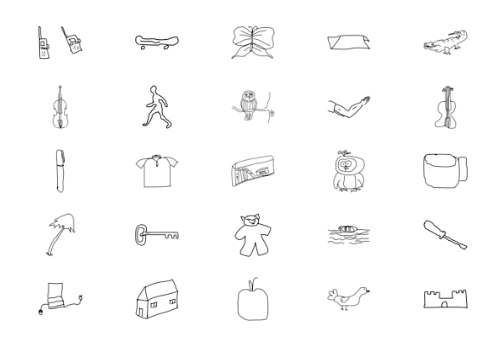

In [3]:
idxs = np.arange(X_train.shape[0])
random.shuffle(idxs)
idxs = idxs[:25]
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.axis('off')
    plt.imshow(X_train[idxs[i], :, :], cmap='gray')

In [8]:
X_train = X_train.reshape(-1, X_train.shape[1] * X_train.shape[2])
y_train = y_train.reshape(-1, y_train.shape[1])
X_val = X_val.reshape(-1, X_val.shape[1] * X_val.shape[2])
y_val = y_val.reshape(-1, y_val.shape[1])
X_test = X_test.reshape(-1, X_test.shape[1] * X_test.shape[2])
y_test = y_test.reshape(-1, y_test.shape[1])

(16000, 4096)
(16000, 250)
(2000, 4096)
(2000, 250)
(2000, 64, 64)
(2000, 250)


In [9]:
print X_train.shape
print y_train.shape
print X_val.shape
print y_val.shape
print X_test.shape
print y_test.shape

(16000, 4096)
(16000, 250)
(2000, 4096)
(2000, 250)
(2000, 4096)
(2000, 250)


In [10]:
import tensorflow as tf
sess = tf.InteractiveSession()

x = tf.placeholder(tf.float32, shape=[None, X_train.shape[1]])
y_ = tf.placeholder(tf.float32, shape=[None, y_train.shape[1]])

W = tf.Variable(tf.zeros([X_train.shape[1], y_train.shape[1]]))
b = tf.Variable(tf.zeros([y_train.shape[1]]))

In [11]:
sess.run(tf.global_variables_initializer())

y = tf.matmul(x, W) + b
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
for i in range(2000):
    batch = next_batch((X_train, y_train), 100, i)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})


In [12]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print accuracy.eval(feed_dict={x: X_test, y_: y_test})

0.004
